# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import sem
from matplotlib.pyplot import pie, axis, show



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [ ]:
#  - - - - - - - - - - DESCRIPTION OF OBSERVATIONS - - - - - - - - - - -  # 

# Trend 1 
 # Interestingly enough, wind speed occurs more when the latitude is lower. The wind speed seems to vary at  
 # lower latitudes, and is less common with latitudes over 10 degrees. 

# Trend 2 
 # The maximum temperature in various cities occur when the latitude is closest to 0. This makes sense as 
 # all of the countries with latitudes close to 0 are countries with high humidity. The max temperature immediately 
 # decreases as soon as the latitude starts to deviate from 0. This makes sense because the larger the latitude is in 
 # either a positive or negative way, the colder it is. (North Pole/ South Pole)

# Trend 3
 # The linear regression plots are nearly opposite for the northern and southern hemisphere in regard to max temp and 
 # and latitude. One would expect this because in the southern hemisphere, latitudes start at 0 and decrease. This 
 # would indicate that the 
    

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
#add url, add city name, but create a loop so it loops through all 600 cities 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [54]:
#setting lists 
cities_found = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

for city in cities: 
    response = requests.get(query_url + city)
    response_json = response.json() 
    try:
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        cities_found.append(city)
        date.append(response_json['dt'])
    except:
        print("Couldnt find " + city)
   

Couldnt find nizhneyansk
Couldnt find vaitupu
Couldnt find belushya guba
Couldnt find babanusah
Couldnt find yingzhong
Couldnt find illoqqortoormiut
Couldnt find karaul
Couldnt find mys shmidta
Couldnt find tawnat
Couldnt find canitas
Couldnt find umzimvubu
Couldnt find bacuit
Couldnt find tabiauea
Couldnt find mocambique
Couldnt find taolanaro
Couldnt find mrirt
Couldnt find mau aima
Couldnt find cockburn harbour
Couldnt find tungkang
Couldnt find meyungs
Couldnt find tsihombe
Couldnt find karauzyak
Couldnt find saleaula
Couldnt find amderma
Couldnt find attawapiskat
Couldnt find barentsburg
Couldnt find afmadu
Couldnt find halalo
Couldnt find portpatrick
Couldnt find barawe
Couldnt find ksenyevka
Couldnt find vitimskiy
Couldnt find sentyabrskiy
Couldnt find maykain
Couldnt find sofiysk
Couldnt find kazalinsk
Couldnt find saint combs
Couldnt find burica
Couldnt find geresk
Couldnt find grand river south east
Couldnt find aflu
Couldnt find kamenskoye
Couldnt find vylgort
Couldnt find g

In [56]:
weather_cities = pd.DataFrame({ "City": cities_found, "Latitude" : lat, "Longitude": lng, "Max Temp (Celsius)": max_temp, "Humidity": humidity,
                               "Cloudiness": cloudiness, "Wind Speed": wind, "Country": country, "Date": date
    
    
    
})



In [57]:
weather_cities

,City,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Country,Date
0,sragen,-7.4264,111.0222,26.68,77,92,1.63,ID,1613955193
1,severo-yeniseyskiy,60.3725,93.0408,-26.32,90,100,1.13,RU,1613955194
2,puerto ayora,-0.7393,-90.3518,24.44,93,69,3.57,EC,1613955025
3,mar del plata,-38.0023,-57.5575,24.00,60,75,4.12,AR,1613954750
4,hilo,19.7297,-155.0900,26.00,65,90,6.17,US,1613954598
...,...,...,...,...,...,...,...,...,...
543,arequipa,-16.3989,-71.5350,13.00,76,40,0.87,PE,1613955091
544,nagyrabe,47.2000,21.3333,1.11,93,0,2.57,HU,1613955357
545,makakilo city,21.3469,-158.0858,27.00,65,90,6.69,US,1613954789
546,mormugao,15.4000,73.8000,25.00,78,75,3.09,IN,1613955357


In [59]:
weather_cities.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
weather_cities.head()

,City,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Country,Date
0,sragen,-7.4264,111.0222,26.68,77,92,1.63,ID,1613955193
1,severo-yeniseyskiy,60.3725,93.0408,-26.32,90,100,1.13,RU,1613955194
2,puerto ayora,-0.7393,-90.3518,24.44,93,69,3.57,EC,1613955025
3,mar del plata,-38.0023,-57.5575,24.00,60,75,4.12,AR,1613954750
4,hilo,19.7297,-155.0900,26.00,65,90,6.17,US,1613954598


In [61]:
weather_cities.describe()

,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,18.349069,13.708839,10.912536,70.861314,50.198905,3.480255,1.613955e+09
std,33.215307,91.878163,17.067987,19.657090,42.689246,2.647533,1.939431e+02
min,-54.800000,-175.200000,-38.810000,9.000000,0.000000,0.090000,1.613955e+09
25%,-7.979700,-68.119325,1.000000,61.000000,1.000000,1.540000,1.613955e+09
50%,21.404050,15.751650,17.170000,76.000000,55.500000,2.785000,1.613955e+09
75%,45.743675,96.658200,24.000000,86.000000,96.000000,4.660000,1.613955e+09
max,78.218600,179.316700,31.460000,100.000000,100.000000,16.460000,1.613955e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#no cities with humidity over 100 as the max humidity was reported to be 100 in the table abo
ve

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

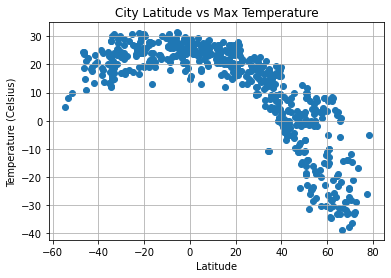

In [62]:
plt.scatter(weather_cities["Latitude"], weather_cities["Max Temp (Celsius)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureVLatitude.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

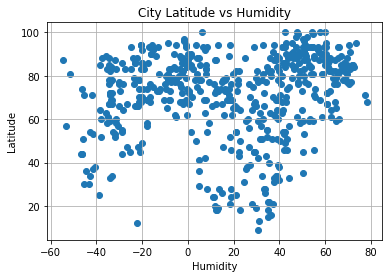

In [63]:
plt.scatter(weather_cities["Latitude"], weather_cities["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVHumidity.png")

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

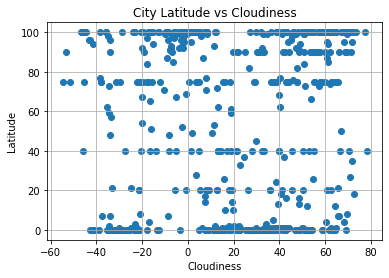

In [64]:
plt.scatter(weather_cities["Latitude"], weather_cities["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVCloudiness.png")

# Show plot
plt.show()


## Latitude vs. Wind Speed Plot

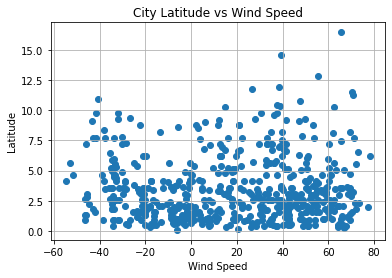

In [65]:
plt.scatter(weather_cities["Latitude"], weather_cities["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVWindSpeed.png")

# Show plot
plt.show()


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
northern_df = weather_cities.loc[weather_cities["Latitude"] > 0]


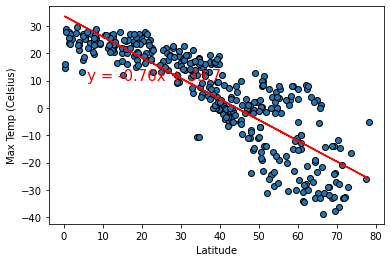

The r value is: -0.8532334880536775
The regression equation is y = -0.76x + 33.7


In [67]:
y_values = northern_df["Max Temp (Celsius)"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temp (Celsius)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [68]:
southern_df = weather_cities.loc[weather_cities["Latitude"] < 0]


In [69]:
southern_df.head()


,City,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Country,Date
0,sragen,-7.4264,111.0222,26.68,77,92,1.63,ID,1613955193
2,puerto ayora,-0.7393,-90.3518,24.44,93,69,3.57,EC,1613955025
3,mar del plata,-38.0023,-57.5575,24.00,60,75,4.12,AR,1613954750
5,airai,-8.9266,125.4092,21.05,81,100,1.33,TL,1613954848
6,fare,-16.7000,-151.0167,27.74,70,100,3.43,PF,1613954898


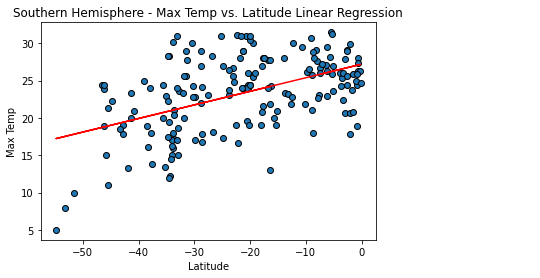

The r value is: 0.49430846656292293
The regression equation is y = 0.18x + 27.19


In [82]:
y_values = southern_df["Max Temp (Celsius)"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

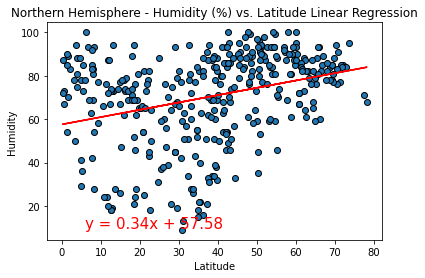

The r value is: 0.31448937445704744
The regression equation is y = 0.34x + 57.58


In [81]:
y_values = northern_df["Humidity"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

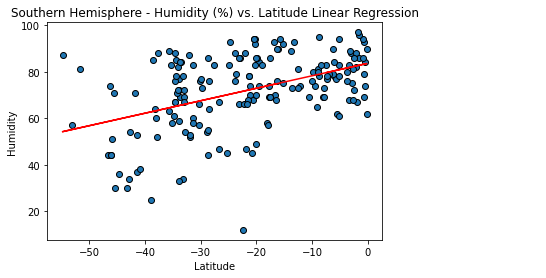

The r value is: 0.46001165596538734
The regression equation is y = 0.54x + 83.66


In [80]:
y_values = southern_df["Humidity"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

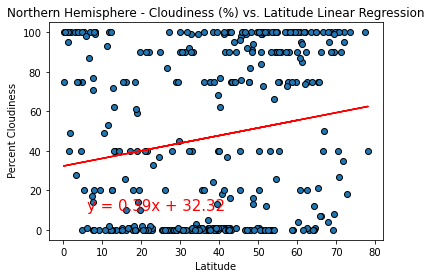

The r value is: 0.17929689876620525
The regression equation is y = 0.39x + 32.32


In [79]:
y_values = northern_df["Cloudiness"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel(" Percent Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

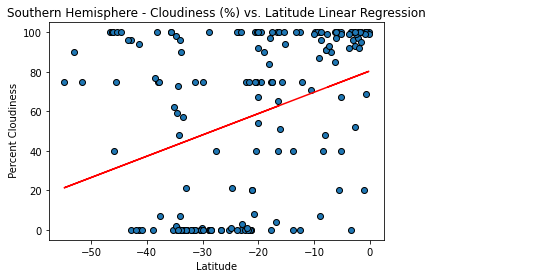

The r value is: 0.3521451032864982
The regression equation is y = 1.08x + 80.41


In [78]:
y_values = southern_df["Cloudiness"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel(" Percent Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

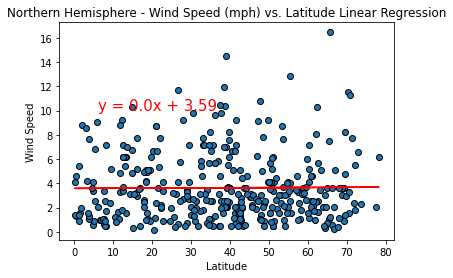

The r value is: 0.008888820120977366
The regression equation is y = 0.0x + 3.59


In [77]:
y_values = northern_df["Wind Speed"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Wind Speed ​​(mph) vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

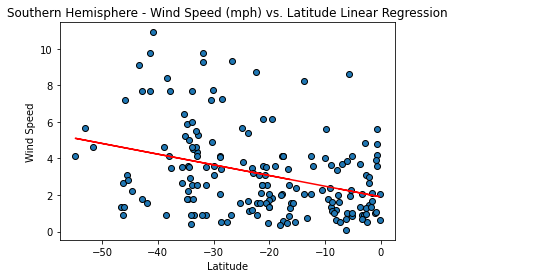

The r value is: -0.3474501796690253
The regression equation is y = -0.06x + 1.9


In [76]:
y_values = southern_df["Wind Speed"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Wind Speed ​​(mph) vs. Latitude Linear Regression")
plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')
